<a href="https://colab.research.google.com/github/Sainithinreddyk/SaiNithinReddy_INFO5731_-Spring2023/blob/main/Nithin_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The df can be download from canvas. The df contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [9]:
# Write your code here


import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [10]:
with open("stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]
    
labels = []
text = []

for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    labels.append(label)
    text.append(tex)

df = pd.DataFrame(list(zip(labels, text)),columns =['Reviews', 'Text'])
df.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [11]:
import nltk
nltk.download()
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))


In [13]:
def get_text_data(file_name):
  with open(file_name) as txtf:
      mylist = [line.strip('\n') for line in txtf]
      
  labels = []
  text = []

  for i, line in enumerate(mylist):
      label = mylist[i][0]
      tex = mylist[i][1:]
      labels.append(label)
      text.append(tex)
  return labels, text

train_data = get_text_data("stsa-train.txt")
train_df = pd.DataFrame(list(zip(train_data[0], train_data[1])),columns =['Reviews', 'Text'])
train_df.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Cleaning Train Data**

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


nltk.download('stopwords')

# initialize stemmer
stemmer = PorterStemmer()

# define preprocess function
def preprocess(text):
    # remove numbers and punctuation
    rem_num = text.replace('\d+', '')
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

# apply preprocess function to 'Text' column
df['clean_Text'] = df['Text'].map(lambda s: preprocess(s))
df.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reviews,Text,clean_Text
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...
5,1,campanella gets the tone just right -- funny ...,campanella gets tone right funny middle sad mi...
6,0,a fan film that for the uninitiated plays bet...,fan film uninitiated plays better video sound ...
7,1,"béart and berling are both superb , while hup...",béart berling superb huppert magnificent
8,0,"a little less extreme than in the past , with...",little less extreme past longer exposition seq...
9,0,the film is strictly routine .,film strictly routine


**TEST DATA**

In [16]:
with open("stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]

labels_test = []
text_test = []

for line in mylist_test:
    label_test, tex_test = line[0], line[1:]
    labels_test.append(label_test)
    text_test.append(tex_test)

df_test = pd.DataFrame({'Reviews': labels_test, 'Text': text_test})
df_test.head()


,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


**Cleaning Test data**

In [17]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    clean_text = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',clean_text)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


df_test['clean_text']=df_test['Text'].map(lambda s:preprocess(s)) 
df_test.head()

,Reviews,Text,clean_text
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(train_df["Text"]).toarray()
test_tfidf = tfidf_vectorizer.transform(df_test["Text"]).toarray()

In [19]:
x_test = test_tfidf
y_test = df_test["Reviews"]

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf,df["Reviews"],test_size = 0.2, random_state = 202)

**1. Multinomial NB**

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create and train the model
classifier = MultinomialNB()
model = classifier.fit(x_train, y_train) 

# Make predictions on the validation set
predictions_validation_set = classifier.predict(x_valid) 

# Calculate performance metrics
accuracy = round(accuracy_score(y_valid, predictions_validation_set) * 100)
precision = round(precision_score(y_valid, predictions_validation_set, pos_label='0') * 100)
recall = round(recall_score(y_valid, predictions_validation_set, pos_label='0') * 100)
f1 = round(f1_score(y_valid, predictions_validation_set, pos_label='0') * 100)

# Print the results
print("Accuracy of the NB: {}%".format(accuracy))
print("Precision of the NB: {}%".format(precision))
print("Recall of the NB: {}%".format(recall))
print("F1 Score of the NB: {}%".format(f1))


Accuracy of the NB: 79%
Precision of the NB: 82%
Recall of the NB: 72%
F1 Score of the NB: 77%


In [22]:
from sklearn.metrics import classification_report

cr_naive_validation = classification_report(y_valid, predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_naive_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       667
           1       0.77      0.85      0.81       717

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [23]:
from sklearn.model_selection import cross_val_score
naive_accuracies_validation = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print(f"Nb 10-fold cross validation score on training set is :  {round(naive_accuracies_validation.mean()*100)}%")

Nb 10-fold cross validation score on training set is :  79%


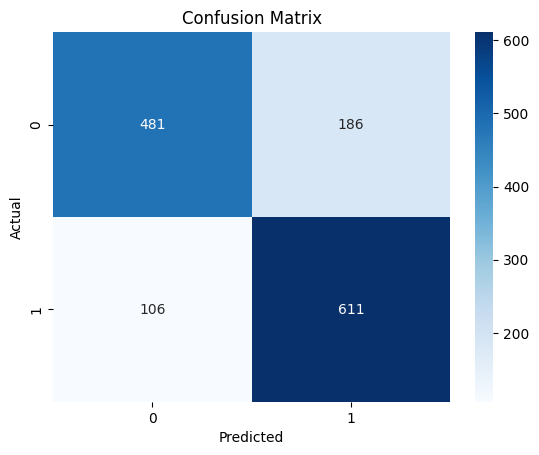

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_valid, predictions_validation_set)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [25]:
predictions_test_set = classifier.predict(x_test) 
print ("Accuracy of the NB test set is : ", round(accuracy_score(y_test, predictions_test_set)*100),"%")
print ("Percision of  the NB test set is: ", round(precision_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the NB test set is : ", round(recall_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the NB test set is : ", round(f1_score(y_test, predictions_test_set, pos_label='0')*100),"%")

Accuracy of the NB test set is :  80 %
Percision of  the NB test set is:  85 %
Recall of the NB test set is :  74 %
F1 Score of the NB test set is :  79 %


In [26]:
cr_naive_test = classification_report(y_test, predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_naive_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       912
           1       0.77      0.87      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821



In [27]:
naive_accuracies_test = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)

print(f"NB 10-fold cross validation score on testing set is :  {round(naive_accuracies_test.mean()*100)}%")

NB 10-fold cross validation score on testing set is :  75%


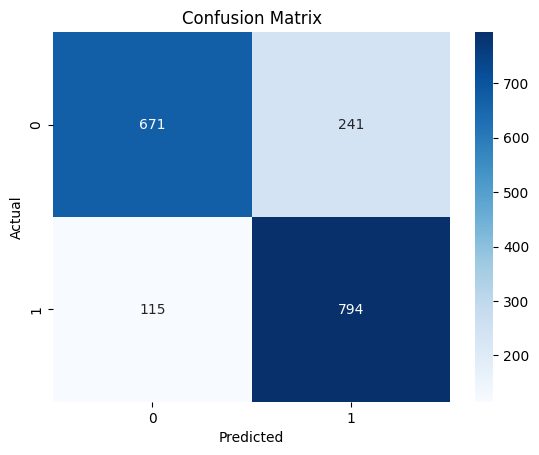

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions_test_set)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


# **2.SVM**

In [29]:
from sklearn import svm

classifier_svm = svm.SVC()
model_svm = classifier_svm.fit(x_train, y_train) 
svm_predictions_validation_set = classifier_svm.predict(x_valid) 

print ("Accuracy of the SVM model on validation set is : ", round(accuracy_score(y_valid, svm_predictions_validation_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the SVM model on validation set is :  79 %
Percision of the SVM model on validation set is :  80 %
Recall of the SVM model on validation set is :  75 %
F1 Score of the SVM model on validation set is :  78 %


In [30]:
from sklearn.metrics import classification_report

cr_svm_validation = classification_report(y_valid, svm_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_svm_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       667
           1       0.78      0.82      0.80       717

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



Confusion matrix: 
[[503 164]
 [128 589]]


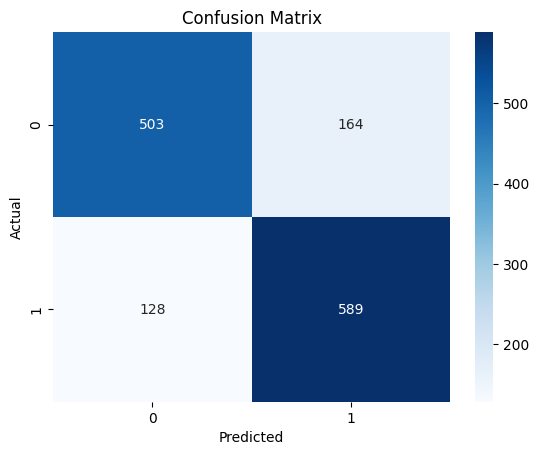

In [31]:
from sklearn.metrics import confusion_matrix

# assuming svm_predictions_validation_set and y_valid are already defined
confusion_mat = confusion_matrix(y_valid, svm_predictions_validation_set)

print("Confusion matrix: ")
print(confusion_mat)
# Plot the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# **KNN**

In [32]:
# Import the KNeighborsClassifier from the Scikit-Learn library
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier class with 15 neighbors
classifier_knn = KNeighborsClassifier(n_neighbors = 15)

# Train the model on the training set using the fit() method
model_knn = classifier_knn.fit(x_train, y_train) 

# Generate predictions for the validation set using the predict() method
knn_predictions_validation_set = classifier_knn.predict(x_valid) 

# Compute and print out the evaluation metrics for the KNN model on the validation set
print ("Accuracy of the KNN  : ", round(accuracy_score(y_valid, knn_predictions_validation_set)*100),"%")
print ("Precision of the KNN  : ", round(precision_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the KNN : ", round(recall_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN : ", round(f1_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")


Accuracy of the KNN  :  73 %
Precision of the KNN  :  75 %
Recall of the KNN :  67 %
F1 Score of the KNN :  71 %


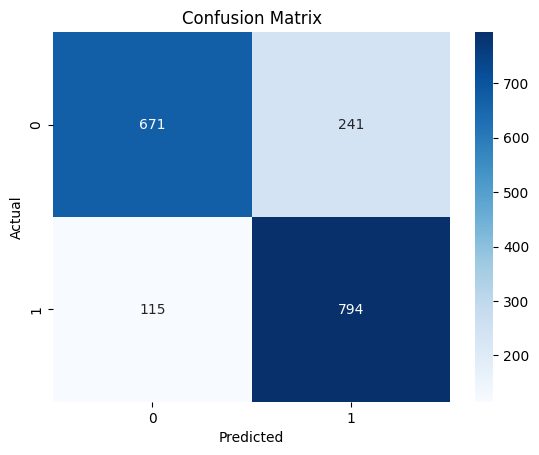

In [33]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [34]:
from sklearn.metrics import classification_report

cr_knn_validation = classification_report(y_valid, knn_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_knn_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       667
           1       0.72      0.79      0.75       717

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384



Confusion Matrix:
 [[447 220]
 [151 566]]


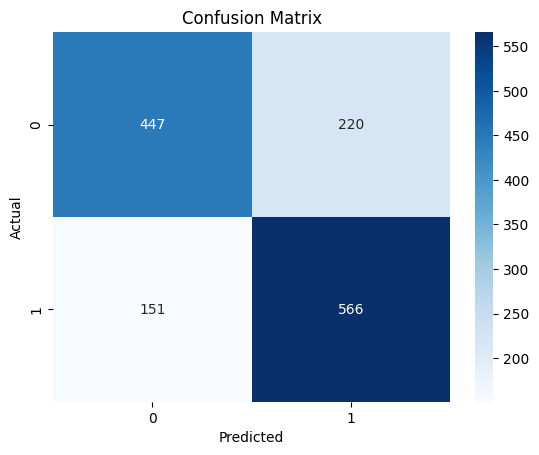

In [35]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the KNN model on the validation set
cm_knn_validation = confusion_matrix(y_valid, knn_predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_knn_validation)

# Plot the confusion matrix
sns.heatmap(cm_knn_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [36]:
from sklearn.model_selection import cross_val_score
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)

print(f"KNN Model  10-fold cross validation score on training set is :  {round(knn_accuracies_validation.mean()*100)}%")

KNN Model  10-fold cross validation score on training set is :  73%


In [37]:
knn_predictions_test_set = classifier_knn.predict(x_test) 
print ("Accuracy of the KNN model on test set is : ", round(accuracy_score(y_test, knn_predictions_test_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the KNN model on test set is :  76 %
Percision of the KNN model on validation set is :  79 %
Recall of the KNN model on validation set is :  70 %
F1 Score of the KNN model on validation set is :  74 %


In [38]:
cr_knn_test = classification_report(y_test, knn_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_knn_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       912
           1       0.73      0.82      0.77       909

    accuracy                           0.76      1821
   macro avg       0.76      0.76      0.75      1821
weighted avg       0.76      0.76      0.75      1821



In [39]:
knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_test, y = y_test, cv = 10)

print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knn_accuracies_test.mean()*100)}%")

KNN Model 10-fold cross validation score on testing set is :  70%


Confusion Matrix:
 [[634 278]
 [167 742]]


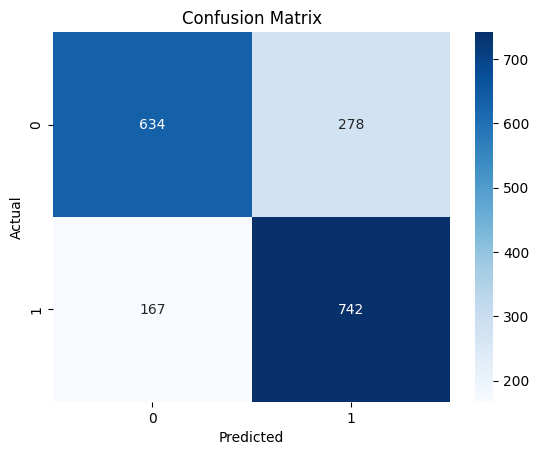

In [40]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the KNN model on the test set
cm_knn_test = confusion_matrix(y_test, knn_predictions_test_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_knn_test)

# Plot the confusion matrix
sns.heatmap(cm_knn_test, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



# **DECISION TREE**

In [41]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
model_dt = classifier_dt.fit(x_train, y_train) 
dt_predictions_validation_set = classifier_dt.predict(x_valid) 

print ("Accuracy of the Decison Tree Classifier model on validation set is : ", round(accuracy_score(y_valid, dt_predictions_validation_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on validation set is :  62 %
Percision of the Decison Tree Classifier model on validation set is :  61 %
Recall of the Decison Tree Classifier model on validation set is :  59 %
F1 Score of the Decison Tree Classifier model on validation set is :  60 %


In [42]:
from sklearn.metrics import classification_report

cr_dt_validation = classification_report(y_valid, dt_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_dt_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.61      0.59      0.60       667
           1       0.63      0.65      0.64       717

    accuracy                           0.62      1384
   macro avg       0.62      0.62      0.62      1384
weighted avg       0.62      0.62      0.62      1384



In [43]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Decision Tree model on the validation set
cm_dt_validation = confusion_matrix(y_valid, dt_predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_dt_validation)

Confusion Matrix:
 [[394 273]
 [254 463]]


Confusion Matrix:
 [[634 278]
 [167 742]]


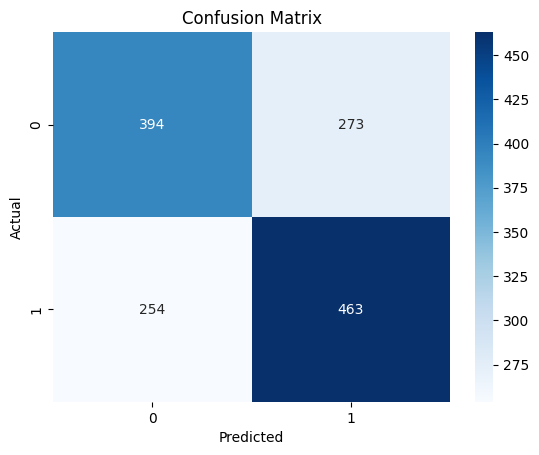

In [44]:
# Print the confusion matrix
print("Confusion Matrix:\n", cm_knn_test)

# Plot the confusion matrix
sns.heatmap(cm_dt_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [45]:
from sklearn.model_selection import cross_val_score
dt_accuracies_validation = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)

print(f"Decison Tree Classifier Model  10-fold cross validation score on training set is :  {round(dt_accuracies_validation.mean()*100)}%")

Decison Tree Classifier Model  10-fold cross validation score on training set is :  61%


In [46]:
dt_predictions_test_set = classifier_dt.predict(x_test) 
print ("Accuracy of the Decison Tree Classifier model on test set is : ", round(accuracy_score(y_test, dt_predictions_test_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on test set is :  63 %
Percision of the Decison Tree Classifier model on validation set is :  64 %
Recall of the Decison Tree Classifier model on validation set is :  57 %
F1 Score of the Decison Tree Classifier model on validation set is :  61 %


In [47]:
cr_dt_test = classification_report(y_test, dt_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_dt_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.64      0.57      0.61       912
           1       0.61      0.68      0.64       909

    accuracy                           0.63      1821
   macro avg       0.63      0.63      0.62      1821
weighted avg       0.63      0.63      0.62      1821



Confusion Matrix:
 [[522 390]
 [291 618]]


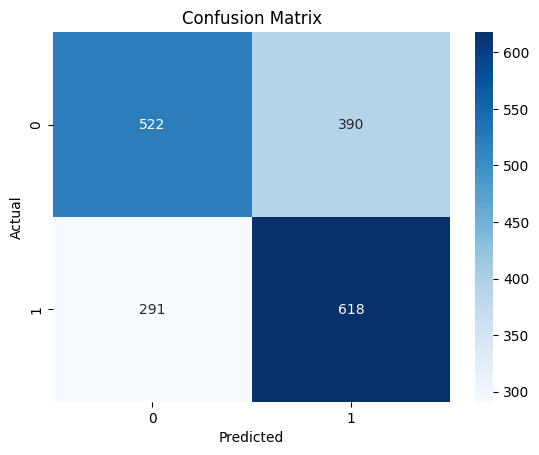

In [48]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Decision Tree model on the test set
cm_dt_test = confusion_matrix(y_test, dt_predictions_test_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_dt_test)

# Plot the confusion matrix
sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



# **RANDOM FOREST**

In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
model_rf = classifier_rf.fit(x_train, y_train) 
rf_predictions_validation_set = classifier_rf.predict(x_valid) 

print ("Accuracy of the Random Forest Classifier model on validation set is : ", round(accuracy_score(y_valid, rf_predictions_validation_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on validation set is :  71 %
Percision of the Random Forest Classifier model on validation set is :  71 %
Recall of the Random Forest Classifier model on validation set is :  66 %
F1 Score of the Random Forest Classifier model on validation set is :  68 %


In [50]:
from sklearn.metrics import classification_report

cr_rf_validation = classification_report(y_valid, rf_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_rf_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68       667
           1       0.70      0.75      0.73       717

    accuracy                           0.71      1384
   macro avg       0.71      0.71      0.71      1384
weighted avg       0.71      0.71      0.71      1384



Confusion Matrix:
 [[440 227]
 [178 539]]


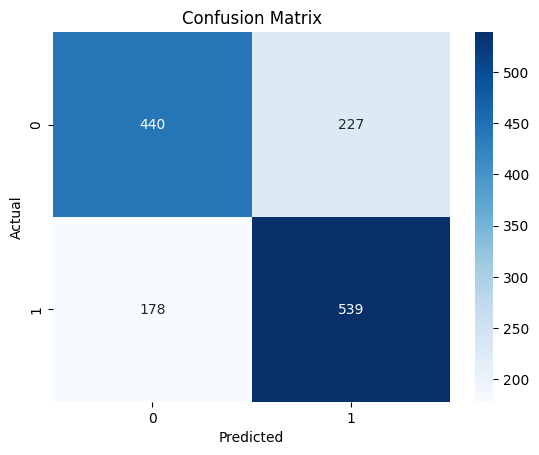

In [51]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Random Forest model on the validation set
cm_rf_validation = confusion_matrix(y_valid, rf_predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_rf_validation)

# Plot the confusion matrix
sns.heatmap(cm_rf_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [52]:
from sklearn.model_selection import cross_val_score
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model  10-fold cross validation score on training set is :  {round(rf_accuracies_validation.mean()*100)}%")

Decison Random Forest Model  10-fold cross validation score on training set is :  72%


In [53]:
rf_predictions_test_set = classifier_rf.predict(x_test) 
print ("Accuracy of the Random Forest Classifier model on test set is : ", round(accuracy_score(y_test, rf_predictions_test_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on test set is :  72 %
Percision of the Random Forest Classifier model on validation set is :  75 %
Recall of the Random Forest Classifier model on validation set is :  67 %
F1 Score of the Random Forest Classifier model on validation set is :  71 %


In [54]:
cr_rf_test = classification_report(y_test, rf_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_rf_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       912
           1       0.70      0.78      0.74       909

    accuracy                           0.72      1821
   macro avg       0.73      0.72      0.72      1821
weighted avg       0.73      0.72      0.72      1821



Confusion Matrix:
 [[609 303]
 [202 707]]


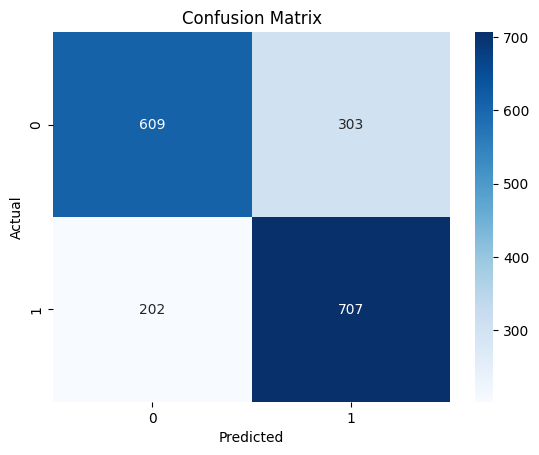

In [55]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Random Forest model on the test set
cm_rf_test = confusion_matrix(y_test, rf_predictions_test_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_rf_test)



# Plot the confusion matrix
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [56]:
rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_test, y = y_test, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation score on testing set is :  {round(rf_accuracies_test.mean()*100)}%")

Random Forest Classifier Model 10-fold cross validation score on testing set is :  69%


# **XG BOOST**

In [57]:
y_train_dup = y_train.astype(int)
y_train_dup.dtype

dtype('int64')

In [58]:
y_test_dup = y_test.astype(int)
y_test_dup.dtype

dtype('int64')

In [59]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
# model_xgb = train_model(classifier_xgb, x_train, y_train_dup, x_test, "XG Boost model")

model_xgb = classifier_xgb.fit(x_train, y_train_dup)
predictions_validation_set = model_xgb.predict(x_test)

print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_test_dup, predictions_validation_set)*100)}%")



Accuracy of the XG Boost model on train: 73%
Percision of the XG Boost model on train: 71%
Recall of the XG Boost model on train: 78%
F1 Score of the XG Boost model on train: 74%


In [60]:
cr_XG_validation = classification_report(y_test_dup, predictions_validation_set)
print("Classification Report on train: ", "\n", "\n",cr_XG_validation)

Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       912
           1       0.71      0.78      0.74       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821



Confusion Matrix on validation set:
 [[617 295]
 [201 708]]


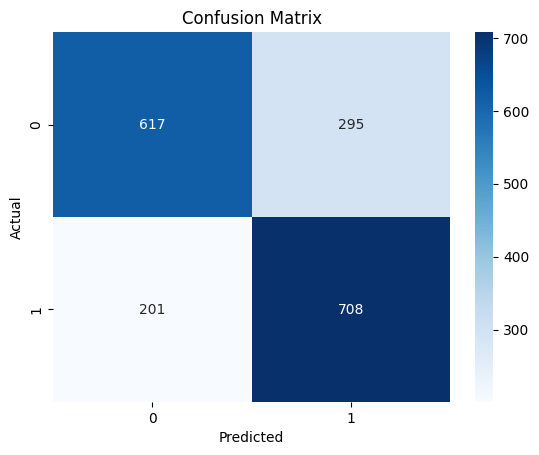

In [61]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the XGBoost model on the validation set
cm_XG_validation = confusion_matrix(y_test_dup, predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix on validation set:\n", cm_XG_validation)



# Plot the confusion matrix
sns.heatmap(cm_XG_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [62]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
xgb_accuracies_validation = cross_val_score(estimator = classifier_xgb, X = x_train, y = y_train_dup, cv = 10)

print(f"XGBoost Model  10-fold cross validation score on training set is :  {round(xgb_accuracies_validation.mean()*100)}%")

XGBoost Model  10-fold cross validation score on training set is :  71%


In [63]:

# test_model(model_xgb, x_valid, y_valid, "XG Boost Model")
predictions_test_set = model_xgb.predict(x_valid)
y_valid_dup = y_valid.astype(int)
y_valid_dup.dtype
print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_valid_dup, predictions_test_set)*100)}%")

cr_XG_validation = classification_report(y_valid_dup, predictions_test_set)
print("Classification Report on train: ", "\n", "\n",cr_XG_validation)

Accuracy of the XG Boost model on train: 70%
Percision of the XG Boost model on train: 70%
Recall of the XG Boost model on train: 76%
F1 Score of the XG Boost model on train: 73%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       667
           1       0.70      0.76      0.73       717

    accuracy                           0.70      1384
   macro avg       0.70      0.70      0.70      1384
weighted avg       0.70      0.70      0.70      1384



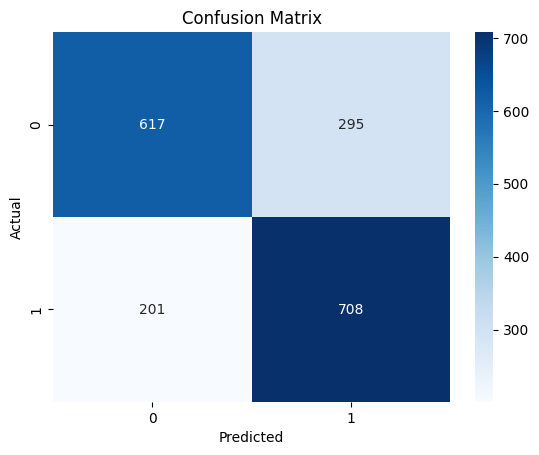

In [64]:
# Plot the confusion matrix
sns.heatmap(cm_XG_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [65]:
xgb_accuracies_test = cross_val_score(estimator = classifier_xgb, X = x_valid, y = y_valid_dup, cv = 10)

print(f"XGBoost Classifier Model 10-fold cross validation score on testing set is :  {round(xgb_accuracies_test.mean()*100)}%")

XGBoost Classifier Model 10-fold cross validation score on testing set is :  62%


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the df by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the df:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [66]:
#Write your code here.
import pandas as pd
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [67]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
cluster_df =df.head(1100)
cluster_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
1095,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,very good,0.0
1096,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Excellent phone for the price, dual sim, unloc...",0.0
1097,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excellent phone functions recommend,0.0
1098,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,I'm so surprise about this phone...great quali...,0.0


In [69]:
# Special characters removal
cluster_df['After noise removal'] = cluster_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Punctuation removal
cluster_df['Punctuation removal'] = cluster_df['After noise removal'].str.replace('[^\w\s]','')

# Remove numbers
cluster_df['Remove numbers'] = cluster_df['Punctuation removal'].str.replace('\d+', '')

# Stopwords removal
stop_word = stopwords.words('english')
cluster_df['Stopwords removal'] = cluster_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
cluster_df['Lower casing'] = cluster_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
cluster_df['Tokenization'] = cluster_df['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
st = PorterStemmer()
cluster_df['Stemming'] = cluster_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

# Lemmatization
cluster_df['Lemmatization'] = cluster_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,very good,0.0,very good,very good,very good,good,good,[good],good,good
1096,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Excellent phone for the price, dual sim, unloc...",0.0,Excellent phone for the price dual sim unloc...,Excellent phone for the price dual sim unloc...,Excellent phone for the price dual sim unloc...,Excellent phone price dual sim unlocked Google...,excellent phone price dual sim unlocked google...,"[excellent, phone, price, dual, sim, unlocked,...",excel phone price dual sim unlock googl play s...,excel phone price dual sim unlock googl play s...
1097,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excellent phone functions recommend,0.0,Excellent phone functions recommend,Excellent phone functions recommend,Excellent phone functions recommend,Excellent phone functions recommend,excellent phone functions recommend,"[excellent, phone, functions, recommend]",excel phone function recommend,excel phone function recommend
1098,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,I'm so surprise about this phone...great quali...,0.0,I m so surprise about this phone great quali...,I m so surprise about this phone great quali...,I m so surprise about this phone great quali...,I surprise phone great quality In cheap price ...,i surprise phone great quality in cheap price ...,"[i, surprise, phone, great, quality, in, 

In [70]:
#kmeans clustering using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_df['Lemmatization'].values)
tfidf.shape

(1100, 2585)

In [71]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10,random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=10, random_state=99)

In [72]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.        , 0.002184  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00024961, 0.00061398, 0.0142014 , ..., 0.0014035 , 0.00039679,
        0.0003453 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
terms1 = tfidf_vect.vocabulary_.keys()

In [74]:
terms_list = list(terms1)
terms_list[1:100]


['lucki',
 'found',
 'use',
 'phone',
 'hard',
 'line',
 'someon',
 'upgrad',
 'sold',
 'one',
 'my',
 'son',
 'like',
 'old',
 'final',
 'fell',
 'apart',
 'year',
 'want',
 'thank',
 'seller',
 'realli',
 'appreci',
 'honesti',
 'said',
 'recommend',
 'highli',
 'would',
 'nice',
 'grade',
 'pantach',
 'revu',
 'veri',
 'clean',
 'set',
 'easi',
 'never',
 'android',
 'fantast',
 'say',
 'least',
 'perfect',
 'size',
 'surf',
 'social',
 'medium',
 'great',
 'samsung',
 'plea',
 'it',
 'work',
 'good',
 'goe',
 'slow',
 'sometim',
 'love',
 'replac',
 'lost',
 'the',
 'thing',
 'volum',
 'button',
 'still',
 'go',
 'adjust',
 'other',
 'job',
 'elig',
 'thaank',
 'alreadi',
 'problem',
 'know',
 'state',
 'dang',
 'charg',
 'wish',
 'read',
 'comment',
 'purchas',
 'item',
 'crack',
 'side',
 'damag',
 'if',
 'tri',
 'anoth',
 'way',
 'request',
 'money',
 'back',
 'and',
 'will',
 'get',
 'sign',
 'an',
 'unhappi',
 'custom',
 'port',
 'loo']

In [75]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.0955187321921093

In [76]:
df1 = cluster_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,2
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,2
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,8
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,2


In [77]:
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0    358
1     39
2    337
3     12
4     52
5     75
6     67
7     55
8     72
9     33
Name: Reviews, dtype: int64

In [78]:
# Reading a description which belong to each group.

for i in range(10):
    print("4 reviews of ensured to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print("_" * 70)

4 reviews of ensured to cluster  0
----------------------------------------------------------------------
Very pleased


pros-beautiful screen,capable of running chrome,take good pictures,the keyboard is comfy,fits in my pocket and fit my hands,plays really good videos and gamescons-no Bluetooth,came late,run down fast really quick,doesnt play 1080p videos.but I would still recommend it to those who like to talk and text a lot like me and watch a lot of movies


I love the phone, but one problem and one problem only............once the mic goes that's it. No more mic. But it can take a beating.


______________________________________________________________________
4 reviews of ensured to cluster  1
----------------------------------------------------------------------
excelente


Excelente


excelente


______________________________________________________________________
4 reviews of ensured to cluster  2
----------------------------------------------------------------------
I feel

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_df['Reviews'].values)
bow.shape

(1100, 3611)

In [80]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [81]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [82]:
from sklearn import metrics
print(metrics.silhouette_score(bow, labels, metric='euclidean'))

0.3916111801803562


In [83]:
cluster_df['Bow Label'] = model.labels_ 
cluster_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,2,8
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,2,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,8,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,2,8


In [84]:
from sklearn.cluster import DBSCAN
import numpy as np

minPts = 2 * 100

def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if (len(dists) == 200 and dists[199] > dist): 
          l = int(lower_bound(dists, dist)) 
          if l < 200 and l >= 0 and dists[l] > dist:
              dists[l] = dist
        else:
          dists.append(dist)
          dists.sort()
    
    return dists[199]

In [85]:
list_of_sent_train = list()

for i in cluster_df["Lower casing"].values:
  list_of_sent_train.append(i.split())

In [86]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

import numpy as np
sent_vectors = [];


import numpy as np
sent_vectors = []; 
count = 1
for sent in list_of_sent_train: # for each reviews
    sent_vec = np.zeros(100)
    cnt_words =1; # num of words in reviews
    for word in sent: # for each word in a reviews
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)


twohundrethneigh = []
for val in sent_vectors[:300]:
    twohundrethneigh.append(compute200thnearestneighbour(val, sent_vectors[:300]) )
twohundrethneigh.sort()

# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [87]:
cluster_df['AVG-W2V Clus Label'] = model.labels_
cluster_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,2,8,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,2,0,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,0,0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,8,0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,2,8,0


In [88]:
import scipy
from scipy.cluster import hierarchy

In [89]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
Agg=cluster.fit_predict(sent_vectors)

aggdfa = cluster_df
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,2,8,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,2,0,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,0,0,4
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,8,0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,2,8,0


In [90]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    482
1    311
2    107
3    136
4     64
Name: Reviews, dtype: int64

K Means: The data are first grouped by similarity, then the data points of k numbers are randomly assigned to disclose the centroids of each group. The remaining data points are plotted to the next nearest centroid, and this process is repeated within each of these groups until the data in the centroids changes, at which point all data sets are logged in the same group.

DB SCAN: Data sets are grouped according to how similar they are, with areas with higher data densities kept as a single group and areas with lower densities saved as noise to distinguish identical data. Density-based spatial grouping of applications with noise is DBSCAN.

Hierarchical clustering: This method combines each document or data point with its most related ones. This creates hierarchical nodes that are connected with the most comparable.

Each data point is assigned to the closest cluster center using the Euclidean distance in the K-means algorithm. K-means performs better on TFIDF data than DBSCAN since the clusters are distinct depending on categories or goods. DBSCAN, on the other hand, uses a density criterion to group together data points that are close to one another. However, all reviews are evenly distributed when it comes to average word vectors, and DBSCAN struggles on a dataset where all reviews are grouped together. By combining or dividing existing clusters based on their proximity, hierarchical clustering creates a hierarchy of clusters. However, because the clusters are not evenly distributed and are challenging to recognize, hierarchical clustering does not perform effectively.

"""